In [1]:
from datetime import datetime, timedelta
import pandas as pd
import tweepy

In [7]:
#download tweets

bearer_token = "AAAAAAAAAAAAAAAAAAAAAH4BlAEAAAAA3Dd4SGtdK%2FWbAqlEdIcXzoPB4%2BA%3DwDjEbymhTQgnmvHM8Vvetae79bgdBz1eyHWSyXZVqRnCCir1nA" #mpolo
limit = 100 #number of tweets to download

client = tweepy.Client(bearer_token)
paginator = tweepy.Paginator( #TODO vedi come filtrare via tutti i tweet con media file
    method=client.search_recent_tweets, #TODO search doc for other usefull parameters
    query=( #TODO check if domain 131 yields different results
        '(context:131.825047692124442624 OR context:152.825047692124442624) ' #https://github.com/twitterdev/twitter-context-annotations
        '-is:retweet ' #TODO check
        'lang:en'), #TODO search doc for other usefull operators
    end_time=datetime.utcnow()-timedelta(days=6), #go backwards starting from 6 days ago TODO check
    expansions=['author_id'], #TODO search doc for other usefull expansions
    max_results=100, #TODO search_all_tweets allows 500
    sort_order=None, #'recency' (default, most recent first) or 'relevancy' TODO test
    tweet_fields=['public_metrics'], #TODO search doc for other usefull tweet fields
    user_fields=['public_metrics']) #TODO search doc for usefull user fields
tweets = paginator.flatten(limit) #generator

TODO `search_recent_tweets` is up to 7 days. To search further back, use [search_all_tweets](https://docs.tweepy.org/en/stable/client.html#tweepy.Client.search_all_tweets) instead (and add `start_time` parameter). But it needs the [academic research access](https://developer.twitter.com/en/docs/projects). It also increases the monthly cap from 500,000 to 10 million.

In [68]:
response = client.search_recent_tweets( #TODO search doc for other usefull parameters
    query=( #TODO check if domain 131 yields different results
        '(context:131.825047692124442624 OR context:152.825047692124442624) ' #https://github.com/twitterdev/twitter-context-annotations
        '-is:retweet ' #TODO check
        'lang:en'), #TODO search doc for other usefull operators
    end_time=datetime.utcnow()-timedelta(days=6), #go backwards starting from 6 days ago TODO check
    expansions=['author_id'], #TODO search doc for other usefull expansions
    max_results=10, #TODO search_all_tweets allows 500
    sort_order=None, #'recency' (default, most recent first) or 'relevancy' TODO test
    tweet_fields=['public_metrics'], #TODO search doc for other usefull tweet fields
    user_fields=['public_metrics']) #get with eg.: response.includes['users'][0].public_metrics

In [77]:
from pprint import pprint 
response.data[0]

{'id': '1610680565723791365',
 'public_metrics': {'retweet_count': 0,
  'reply_count': 0,
  'like_count': 0,
  'quote_count': 0,
  'impression_count': 5},
 'text': "This dope still on bullshit  ''' guys change your diet ''' you need there bs bullshit  '' oh and for food hight prices so all good ''' ya clowns https://t.co/NbwUXM0Dsi",
 'author_id': '1451606593838137348',
 'edit_history_tweet_ids': ['1610680565723791365']}

In [101]:
paginator = tweepy.Paginator( #TODO vedi come filtrare via tutti i tweet con media file
    method=client.search_recent_tweets, #TODO search doc for other usefull parameters
    query=( #TODO check if domain 131 yields different results
        '(context:131.825047692124442624 OR context:152.825047692124442624) ' #https://github.com/twitterdev/twitter-context-annotations
        '-is:retweet ' #TODO check
        'lang:en'), #TODO search doc for other usefull operators
    end_time=datetime.utcnow()-timedelta(days=6), #go backwards starting from 6 days ago TODO check
    expansions=['author_id'], #TODO search doc for other usefull expansions
    max_results=10, #TODO search_all_tweets allows 500
    sort_order=None, #'recency' (default, most recent first) or 'relevancy' TODO test
    tweet_fields=['public_metrics'], #TODO search doc for other usefull tweet fields
    user_fields=['public_metrics'],  #TODO search doc for usefull user fields
    limit=2) #PROVATO AD AGGIUNGERE QUESTO IMO SERVE SE NON USI FLATTEN


# prova https://stackoverflow.com/a/72766978 per gli includes
#responses = iter(paginator)


#responses = iter(paginator)

dataset = []
for response in paginator:   #TODO MAKE SURE THAT USERS HAVE SAME ORDER THAN TWEETS
    for tweet, user in zip(response.data, response.includes['users']):
        dataset += [(
            tweet.data['text'],
            tweet.data['public_metrics']['like_count'],
            user.public_metrics['followers_count'])]
df = pd.DataFrame(dataset)
df

,0,1,2
0,So you're gonna start the New Year off by eati...,0,172
1,if anyone has recipes for making fish not tast...,0,173
2,@wormontheground Granted with things like food...,0,221
3,"Me: Wakes up early to pack a nice, semi-nutrit...",19,716
4,finally brought lunch to work,0,922
5,"1k of new words on this story, and I'm done wi...",1,1081
6,Are we going to lift on our lunch break? I bel...,0,3214
7,Here’s my Honest review of Amy Ruth’s Soul Foo...,3,1169
8,Everybody else decided on cava for lunch too 🙄,0,506
9,@rajdoc2005 @AkhilNarangMD @mswami001 @tiffche...,2,25133


In [83]:
#create dataframe

df = pd.DataFrame([
    tweet.data['text'],
    tweet.data['public_metrics']['like_count'],
    tweet.data['author_id'],
    tweet.data.includes] for tweet in tweets)

#forse con paginator non si riesce a prendere gli `includes` easy?
#https://docs.tweepy.org/en/stable/faq.html#how-do-i-access-includes-data-while-using-paginator

df.rename(columns={0: 'text', 1: 'likes', 2: 'author_id', 3: '??'}, inplace=True)
display(df)

Response(data=[<Tweet id=1610684472415887360 text='Just had a bird land on my lunch table at the hospital. Good stuff.'>, <Tweet id=1610684468398022656 text='@Ariquxeen Yea🤔You beat me up last week n stole my lunch food stamps card😩😭'>, <Tweet id=1610684459178930177 text='Not sure if I should use my lunch break to actually eat or take a nap 🤔'>, <Tweet id=1610684457912078338 text='How about a handshake and maybe a kiss on the cheek before departing after lunch https://t.co/HPhtJIbdir'>, <Tweet id=1610684455240495104 text='Southern Recipe Sacks For Snacks #Sweepstakes! Grand Prize includes a year of pork rinds, 12 cases of Rudolph Family of Brands snacks and/or products and five thousand dollars (ARV $5,500) #giveaway #free #winner @sr_smallbatch #PorkRindAppreciationDay  https://t.co/DzNmabCRol'>, <Tweet id=1610684452153483264 text="It's time for Jamie to have lunch.🥰 https://t.co/zI9R6qU7cG">, <Tweet id=1610684444519665675 text='them yt kids that only used to eat slim jims for lunch b

In [84]:
next(tweets)

Response(data=[<Tweet id=1610684004956606483 text='I have more than 10 minutes for lunch this semester 😍😍😍😍'>, <Tweet id=1610684002914168832 text='A Marwadi cook studying microcuisines from Tamil Nadu -  making Jigarthanda from Sarsaparilla root. Self-taught home chefs baking Japanese pancakes, whipping up Korean salads and Vietnamese curries. Masterchef India is truly a global experience. Loving this season so far!'>, <Tweet id=1610684000699387924 text="55 Mil Volume and 17's coming up all before Lunch\nwith Official Announcement soon!  $icnm https://t.co/Na5nPduOSl">, <Tweet id=1610684000003133458 text='@MicahToll How large is the bed? \nAnd this is just bonkers, because I need my lifted RAM 5000/F150 raptor to haul my backpack with my lunch, gym clothes and my laptop to work everyday. You can’t do that with your perfect “truck” for the city!'>, <Tweet id=1610683997012594711 text='🔥 🍖 🍺 FIRE-OBSESSED culinary geniuses Acme Fire Cult have brought the heat to Dalston where they have se

In [85]:
next(tweets)

StopIteration: 

In [10]:
#create dataframe

df = pd.DataFrame([
    tweet.data['text'],
    tweet.data['public_metrics']['like_count'],
    tweet.data['author_id'],
    tweet.data.includes] for tweet in tweets)

#forse con paginator non si riesce a prendere gli `includes` easy?
#https://docs.tweepy.org/en/stable/faq.html#how-do-i-access-includes-data-while-using-paginator

df.rename(columns={0: 'text', 1: 'likes', 2: 'author_id', 3: '??'}, inplace=True)
display(df)

AttributeError: 'dict' object has no attribute 'includes'

In [3]:
#getting the number of followers(we need to do a for loop because we can ask for up to 100 followers at the time)
user_list = list(df_tweets["user_id"])
followers = pd.DataFrame()
#print(user_list[(1-1)*100:1*100-1])
for i in range(0,limit//100):
    users = tweepy.Paginator(client.get_users, 
                                 ids=user_list[i*100:(i+1)*100],
                                 user_fields=['public_metrics']).flatten(limit=100)
    f = pd.DataFrame([user.data['public_metrics']['followers_count'] for user in users])
    followers = pd.concat([followers,f])
    
followers = followers.reset_index(drop=True)

#Let's add the column for the followers
df_tweets['followers'] = followers
display(df_tweets)

Unexpected parameter: pagination_token
Unexpected parameter: pagination_token
Unexpected parameter: pagination_token
Unexpected parameter: pagination_token
Unexpected parameter: pagination_token
Unexpected parameter: pagination_token
Unexpected parameter: pagination_token
Unexpected parameter: pagination_token
Unexpected parameter: pagination_token
Unexpected parameter: pagination_token
Unexpected parameter: pagination_token
Unexpected parameter: pagination_token
Unexpected parameter: pagination_token
Unexpected parameter: pagination_token
Unexpected parameter: pagination_token
Unexpected parameter: pagination_token
Unexpected parameter: pagination_token
Unexpected parameter: pagination_token
Unexpected parameter: pagination_token
Unexpected parameter: pagination_token
Unexpected parameter: pagination_token
Unexpected parameter: pagination_token
Unexpected parameter: pagination_token
Unexpected parameter: pagination_token
Unexpected parameter: pagination_token
Unexpected parameter: pag

,text,retweet,likes,user_id,followers
0,@postingtime Lot of insoluble fiber so early i...,0,1,1039275864964378626,3461
1,Finished Lunch? Ribbed for my pleasure.... Di...,0,0,1599327687432077314,45
2,"St Peter coming back off his lunch break: ""God...",0,6,3312093513,1783
3,Have you had Chris' Homemade Chicken Vegetable...,0,0,885947997472927746,257
4,#RecipeOfTheDay\n#Food 😋\nQuick and Easy Recip...,0,0,1476742116,7138
...,...,...,...,...,...
9995,@JohnDFinest Token for lunch \nThanks and God ...,0,0,1560545050890801154,1088
9996,@DontBotherKeiti I hope your message finds her...,0,0,1000111986917572608,186
9997,just throwed up my whole lunch and now im too ...,0,0,1129012366744547328,129
9998,@Kish2802 @fgautier26 First of all..\n\nWho is...,0,0,1306540126193856512,0


In [4]:
import os

path = os.getcwd()
df_tweets.to_csv(os.path.join(path,'debug_set.csv'))#creates a csv file containing the tweets

In [6]:
df_tweets = pd.read_csv('debug_set.csv', lineterminator='\n') #https://stackoverflow.com/a/48187106

In [18]:
#between: https://stackoverflow.com/a/67711603

#ma idealmente prendi tipo solo tweet di 7 giorni fa

splits = [df_tweets[df_tweets['followers'].between(200*i, 200*(i+1), inclusive='left')] for i in range(10)]
for i, split in enumerate(splits):
    split['range'] = i
df = pd.concat(splits)
df = df.groupby(df['range']).mean() #poi mean quando trovi range significativi
df

/tmp/ipykernel_19339/2009714878.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  split['range'] = i
/tmp/ipykernel_19339/2009714878.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  split['range'] = i
/tmp/ipykernel_19339/2009714878.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a

,Unnamed: 0,retweet,likes,user_id,followers
range,,,,,
0,5094.099137,0.066834,1.051239,1.086139e+18,65.381509
1,4942.592075,0.201243,2.389277,7.663870e+17,289.780886
2,4854.555280,0.264596,2.624845,6.308881e+17,494.627329
3,4766.502804,0.203738,2.828037,5.835351e+17,691.579439
4,4908.955083,0.581560,5.080378,5.093844e+17,895.163121
5,4263.911111,0.327778,4.058333,4.760714e+17,1087.533333
6,5169.367347,0.520408,4.591837,4.673509e+17,1295.384354
7,4998.732510,0.786008,10.308642,4.138529e+17,1496.271605
8,4916.593407,1.549451,12.609890,4.713874e+17,1707.802198


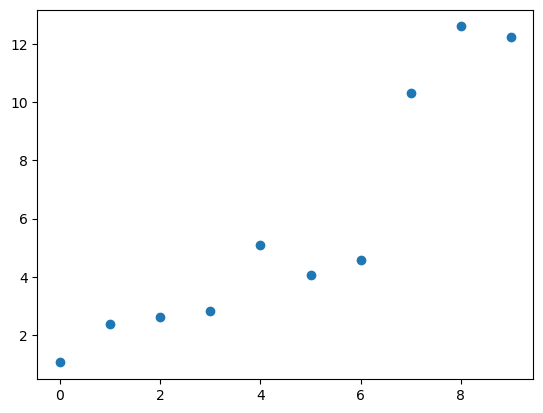

In [19]:
import matplotlib.pyplot as plt
plt.scatter(df.index, df['likes'])